# Plot convolution

In [1]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:38939")
client

<Client: 'tcp://127.0.0.1:38939' processes=4 threads=8, memory=61.46 GiB>

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from os.path import join,expanduser
import sys

# import emu plotting tools
sys.path.append('/efs_ecco/ECCO/EMU/emu_userinterface_dir/')
import emu_plot_arg_py as ept

import lib_python
import plot_conv
import plot_conv_sub

# identify user's home directory
user_home_dir = expanduser('~')

# import the ECCOv4 py library 
sys.path.insert(0,join(user_home_dir,'ECCOv4-py'))
import ecco_v4_py as ecco

## Paths to EMU outputs:

Sampling (relative to global mean):
`/efs_ecco/mzahn/emu_samp/emu_samp_m_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0-gmn_1` <br>

Sampling (not relative to global mean):
`/efs_ecco/mzahn/emu_samp_v2/emu_samp_m_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1` <br>

Adjoint:
`/efs_ecco/mzahn/emu_mackenzie/emu_adj_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1` <br>

Convolution:
`/efs_ecco/mzahn/emu_conv/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_1196` <br>
round 2: `/efs_ecco/mzahn/emu_conv_v2/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_50`

**The code below opens EMU output as a dictionary and then generates plots that are similar to the menu-driven outputs**

### Sampling

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs_ecco/ECCO/EMU2/emu_input_dir



Enter directory of EMU run to examine; e.g., emu_samp_m_2_45_585_1 ... ?  /efs_ecco/mzahn/emu_samp_v2/emu_samp_m_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1



Reading /efs_ecco/mzahn/emu_samp_v2/emu_samp_m_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1

Reading Sampling Tool output ... 

*********************************************
Read variables
   smp: temporal anomaly of sampled variable
   smp_mn: reference time-mean of sampled variable
from file /efs_ecco/mzahn/emu_samp_v2/emu_samp_m_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1/output/samp.out_312

*********************************************
Read variable
   smp_hr: sample time (hours from 1/1/1992 12Z)
from file /efs_ecco/mzahn/emu_samp_v2/emu_samp_m_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1/output/samp.step_312

Plotting sampled time-series ... 


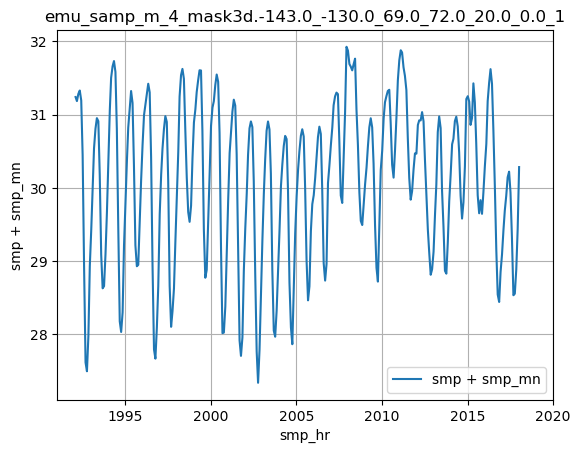


***********************
EMU variables read as global variables in module global_emu_var (emu); e.g., emu.nx
***********************
cs                  drc                 drf                 dvol3d              
dxc                 dxg                 dyc                 dyg                 
hfacc               hfacs               hfacw               nr                  
nx                  ny                  rac                 ras                 
raw                 raz                 rc                  rf                  
smp                 smp_hr              smp_mn              sn                  
xc                  xg                  yc                  yg                  


In [21]:
import runpy
runpy.run_path('/efs_ecco/ECCO/EMU/emu_userinterface_dir/python/emu_plot.py');
# The following that uses a module go through the same menu-driven process s using runpy above, but 
# globals_dict is a dictionary, containing 'return_vars' and 'emu'.
# return_vars' contains the data used to make the plot.
# emu contains more variables that were used in ept.
# globals_dict = ept.emu_plot()

In [22]:
globals_dict_samp = ept.emu_plot(run_name="/efs_ecco/mzahn/emu_samp_v2/emu_samp_m_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1")

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs_ecco/ECCO/EMU2/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/mzahn/emu_samp_v2/emu_samp_m_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1

Reading /efs_ecco/mzahn/emu_samp_v2/emu_samp_m_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1

Reading Sampling Tool output ... 

*********************************************
Read variables
   smp: temporal anomaly of sampled variable
   smp_mn: reference time-mean of sampled variable
from file /efs_ecco/mzahn/emu_samp_v2/emu_samp_m_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1/output/samp.out_312

*********************************************
Read variable
   smp_hr: sample time (hours from 1/1/1992 12Z)
from file /efs_ecco/mzahn/emu_samp_v2/emu_samp_m_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1/output/samp.step_312

Plotting sampled time-series ... 

***********************
EMU variables read as global variables in module global_e

In [23]:
globals_dict_samp['return_vars'].keys()

dict_keys(['time_values', 'variable', 'samp_path'])

In [24]:
sss_box = globals_dict_samp['return_vars']['variable']
samp_time_box = globals_dict_samp['return_vars']['time_values']

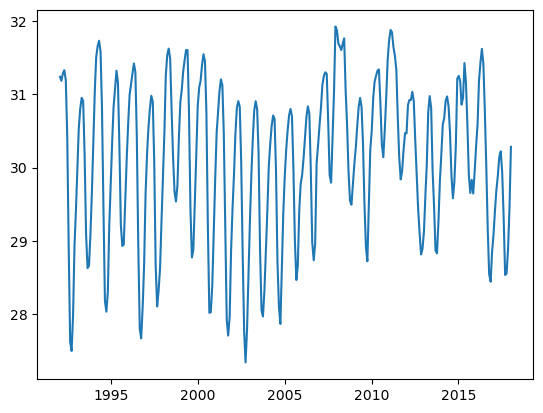

In [25]:
plt.plot(globals_dict_samp['return_vars']['time_values'],sss_box);

In [26]:
delta_sss_box = sss_box - sss_box.mean()

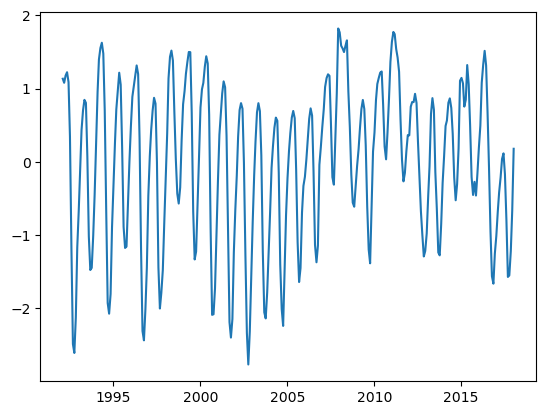

In [27]:
plt.plot(globals_dict_samp['return_vars']['time_values'],delta_sss_box);

## Plot cost function from adjoint

In [3]:
cost_dir = '/efs_ecco/mzahn/emu_mackenzie/emu_adj_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1/temp'
fname = 'm_boxmean_salt.0000000129.data'

In [74]:
def open_binary_file_to_xda(dir_str, fname_str, nweeks):

    tiles = ecco.read_llc_to_tiles(dir_str, fname_str, llc=90,nk=1,nl=nweeks) # 1357 is number of weeks
    # compact = ecco.llc_compact_to_faces(compact_data)
    # tiles = ecco.llc_faces_to_tiles(compact)
    da = ecco.llc_tiles_to_xda(tiles, var_type='c', dim4='depth', dim5='time')

    return da

In [9]:
box_mean = ecco.read_llc_to_tiles(cost_dir, fname, llc=90,nk=1,nl=12)
box_mean_da = ecco.llc_tiles_to_xda(box_mean, var_type='c', dim4='depth', dim5='time')

load_binary_array: loading file /efs_ecco/mzahn/emu_mackenzie/emu_adj_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1/temp/m_boxmean_salt.0000000129.data
load_binary_array: data array shape  (12, 1, 1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (12, 1, 1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (12, 1, 13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4


In [19]:
box_mean_da.isel(time=10).sum().values

array(31.936388, dtype=float32)

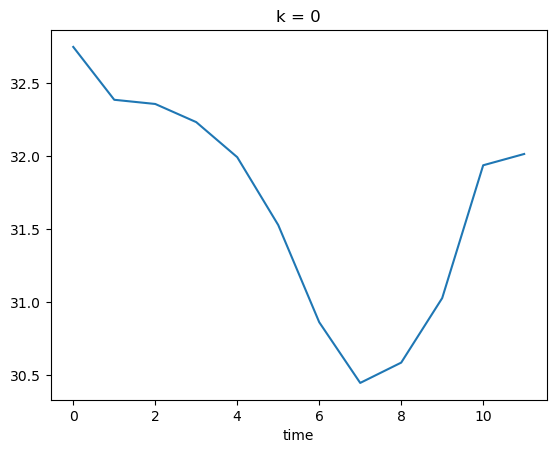

In [17]:
box_mean_da.sum(dim=['tile','i','j']).plot(x='time');

### Adjoint

In [31]:
globals_dict_adj = ept.emu_plot(run_name="/efs_ecco/mzahn/emu_mackenzie/emu_adj_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1/",
                            ctrl_num_list=[1, 2, 3, 4, 5, 6, 7, 8],
                            lag_beg=0, lag_end=1000000);

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs_ecco/ECCO/EMU2/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/mzahn/emu_mackenzie/emu_adj_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1/

Reading /efs_ecco/mzahn/emu_mackenzie/emu_adj_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1

Reading Adjoint Tool output ... 

Found file: adxx_empmr.0000000129.data

*********************************************
Read adjoint gradient for empmr
   adxx: adjoint gradient as a function of space and lag
from file /efs_ecco/mzahn/emu_mackenzie/emu_adj_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1/output/adxx_empmr.0000000129.data
 
Zero lag at (week/record) = 1197
Max  lag at (week/record) = 1148
Specified start and end files #: 0 and 1000000

*********************************************
Outputting adxx_empmr

Found file: adxx_pload.0000000129.data

*********************************************
Read adjoint grad

*Refer to Noah's code for the animation of the adjoint output*

### Convolution

### Method 1: Menu-driven Input

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs_ecco/ECCO/EMU2/emu_input_dir



Enter directory of EMU run to examine; e.g., emu_samp_m_2_45_585_1 ... ?  /efs_ecco/mzahn/emu_conv_v2/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_50



Reading /efs_ecco/mzahn/emu_conv_v2/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_50

Reading Convolution Tool output ... 
<_io.BufferedReader name='/efs_ecco/mzahn/emu_conv_v2/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_50/output/recon1d_empmr.data'>
<_io.BufferedReader name='/efs_ecco/mzahn/emu_conv_v2/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_50/output/recon1d_pload.data'>
<_io.BufferedReader name='/efs_ecco/mzahn/emu_conv_v2/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_50/output/recon1d_qnet.data'>
<_io.BufferedReader name='/efs_ecco/mzahn/emu_conv_v2/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_50/output/recon1d_qsw.data'>
<_io.BufferedReader name='/efs_ecco/mzahn/emu_conv_v2/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_50/output/recon1d_saltflux.data'>
<_io.BufferedReader name='/efs_ecco/mzahn/emu_conv_v2/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_50/output/recon1

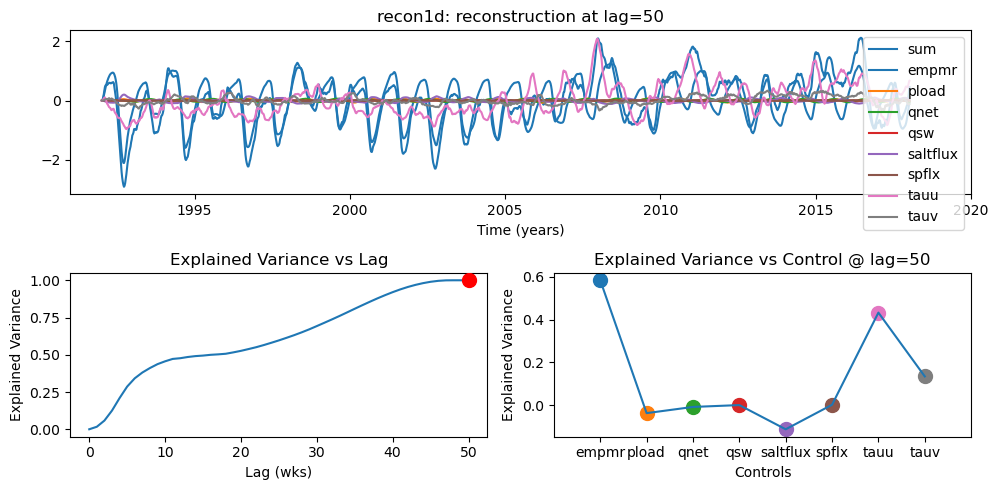

Enter lag to plot ... (0-50 or -1 to exit)?  -1


Read recon2d to compute explained variance vs space ... (y/n)?  y


Reading recon2d_*.data and computing explained variance vs space (ev_space) ...

Variable recon2d is the adjoint gradient reconstruction (time-series)
as a function of space by a particular control using the maximum lag
chosen in the convolution. Here, recon2d is read to compute the explained
variance vs space (ev_space), but recon2d is not retained by this plotting
routine to minimize memory usage.

*********************************************
Read variable recon2d from file
/efs_ecco/mzahn/emu_conv_v2/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_50/output/recon2d_empmr.data

*********************************************
Read variable recon2d from file
/efs_ecco/mzahn/emu_conv_v2/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_50/output/recon2d_pload.data

*********************************************
Read variable recon2d from file
/efs_ecco/mzahn/emu_conv_v2/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_50/output/recon2d_qnet.data

******

Enter control to plot explained variance (EV) vs space ...  (1-8)?  1


Control chosen: empmr


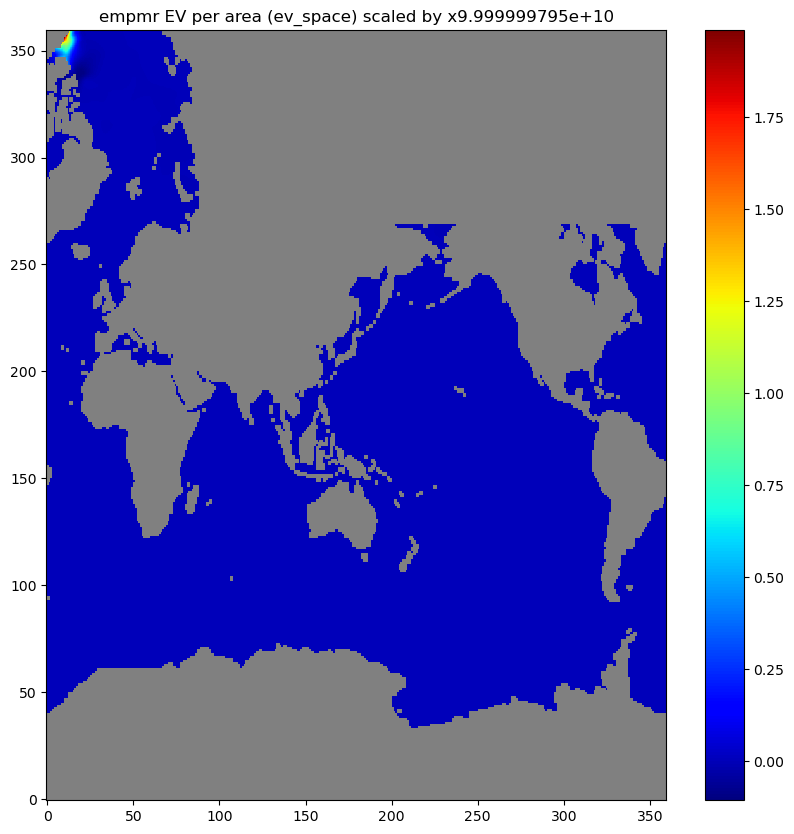

Enter control to plot explained variance (EV) vs space ...  (1-8)?  7


Control chosen: tauu


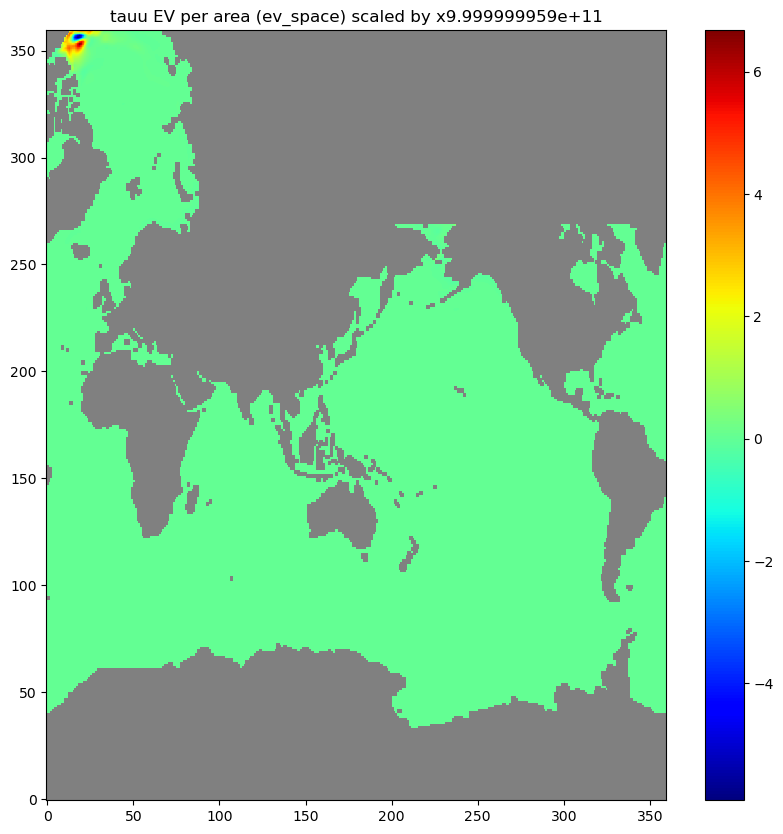

Enter control to plot explained variance (EV) vs space ...  (1-8)?  8


Control chosen: tauv


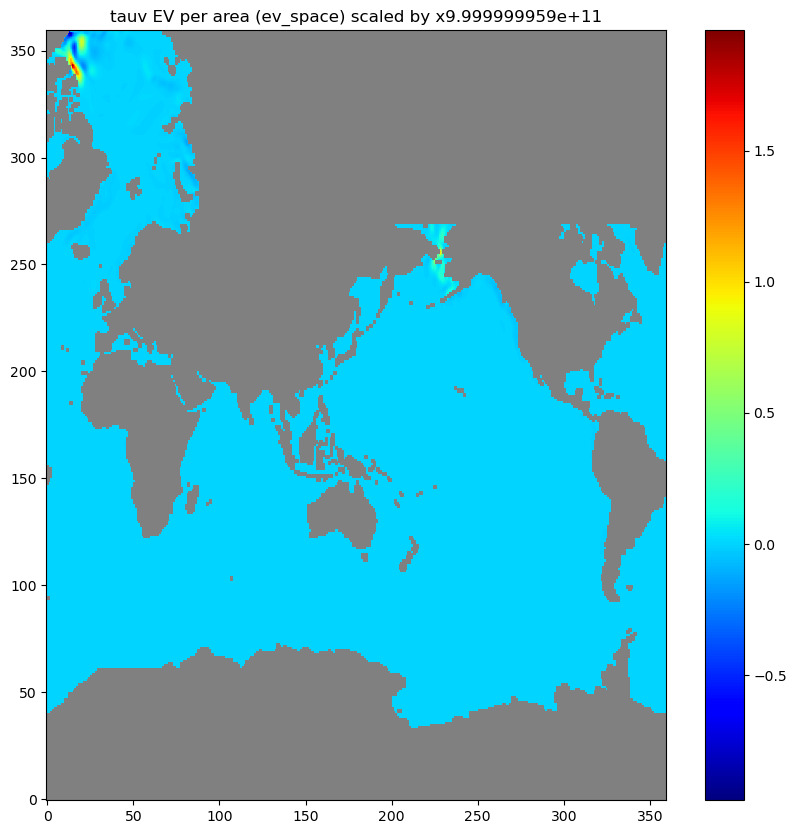

Enter control to plot explained variance (EV) vs space ...  (1-8)?  -1



***********************
EMU variables read as global variables in module global_emu_var (emu); e.g., emu.nx
***********************
cs                  drc                 drf                 dvol3d              
dxc                 dxg                 dyc                 dyg                 
ev_ctrl             ev_lag              ev_space            hfacc               
hfacs               hfacw               istep               nr                  
nx                  ny                  rac                 ras                 
raw                 raz                 rc                  recon1d             
rf                  sn                  xc                  xg                  
yc                  yg                  


In [8]:
import runpy
runpy.run_path('/efs_ecco/ECCO/EMU/emu_userinterface_dir/python/emu_plot.py');
# The following that uses a module go through the same menu-driven process s using runpy above, but 
# globals_dict is a dictionary, containing 'return_vars' and 'emu'.
# return_vars' contains the data used to make the plot.
# emu contains more variables that were used in ept.
# globals_dict = ept.emu_plot()

In [3]:
# pull out dictionary of the convolution output
globals_dict_conv = ept.emu_plot(run_name="/efs_ecco/mzahn/emu_conv_v2/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_50",
                            expvar_space='y');

Found file: /efs_ecco/ECCO/EMU/emu_userinterface_dir/emu_env.singularity
EMU Input Files directory: /efs_ecco/ECCO/EMU2/emu_input_dir

Specified directory of EMU run to examine: /efs_ecco/mzahn/emu_conv_v2/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_50

Reading /efs_ecco/mzahn/emu_conv_v2/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_50

Reading Convolution Tool output ... 
<_io.BufferedReader name='/efs_ecco/mzahn/emu_conv_v2/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_50/output/recon1d_empmr.data'>
<_io.BufferedReader name='/efs_ecco/mzahn/emu_conv_v2/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_50/output/recon1d_pload.data'>
<_io.BufferedReader name='/efs_ecco/mzahn/emu_conv_v2/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_50/output/recon1d_qnet.data'>
<_io.BufferedReader name='/efs_ecco/mzahn/emu_conv_v2/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_50/output/recon1d_qsw.data'>
<_io.Buffe

In [4]:
# see what is inside dictionary
print(globals_dict_conv.keys())
print(globals_dict_conv['return_vars'].keys())

dict_keys(['return_vars', 'emu'])
dict_keys(['time_values', 'time_values_min', 'time_values_max', 'recon1d_sum_all_ctrl_vs_lag_time', 'recon1d_vs_lag_time', 'lag_in_weeks', 'expvar_vs_lag', 'ctrl_idx', 'expvar_vs_ctrl', 'num_lag_in_weeks', 'num_ctrl', 'ctrl_name', 'ctrl_idx_min', 'ctrl_idx_max', 'expvar_vs_space'])


In [5]:
globals_dict_conv['return_vars']['recon1d_vs_lag_time'].shape

(8, 51, 1357)

In [6]:
# Extract return dictionary
return_vars_dict = globals_dict_conv.get('return_vars')

In [7]:
# Extract data for the plot
lag_in_weeks = return_vars_dict['lag_in_weeks'] 
time_values = return_vars_dict['time_values'] 
ctrl_name = return_vars_dict['ctrl_name']
recon1d_sum_all_ctrl_vs_lag_time = return_vars_dict['recon1d_sum_all_ctrl_vs_lag_time']
recon1d_vs_lag_time = return_vars_dict['recon1d_vs_lag_time']
expvar_vs_lag = return_vars_dict['expvar_vs_lag']
expvar_vs_ctrl = return_vars_dict['expvar_vs_ctrl']
ctrl_name = return_vars_dict['ctrl_name']
expvar_vs_space = return_vars_dict['expvar_vs_space']

In [8]:
recon1d_vs_lag_time.shape

(8, 51, 1357)

## empmr explained variance in space

In [9]:
empmr_expvar_vs_space_faces = ecco.llc_compact_to_faces(expvar_vs_space[0,:,:])
empmr_expvar_vs_space_tiles = ecco.llc_faces_to_tiles(empmr_expvar_vs_space_faces)
empmr_expvar_vs_space_da = ecco.llc_tiles_to_xda(empmr_expvar_vs_space_tiles, var_type='c', dim4='time')

llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4


In [10]:
# open grid file
ecco_grid = xr.open_dataset('/efs_ecco/ECCO/V4/r5/grid/nctiles_grid/ECCO-GRID.nc')

In [11]:
land = ecco_grid.hFacC.isel(k=0).where(ecco_grid.hFacC.isel(k=0)!=True)

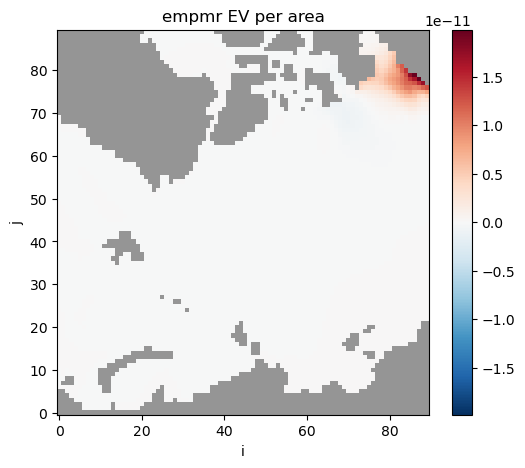

In [12]:
fig, ax = plt.subplots(1,1,figsize=[6,5])
empmr_expvar_vs_space_da.isel(tile=6).plot(ax=ax);
land.isel(tile=6).plot(ax=ax,cmap='Grays',add_colorbar=False);
ax.set_title('empmr EV per area');

In [13]:
tauu_expvar_vs_space_faces = ecco.llc_compact_to_faces(expvar_vs_space[-2,:,:])
tauu_expvar_vs_space_tiles = ecco.llc_faces_to_tiles(tauu_expvar_vs_space_faces)
tauu_expvar_vs_space_da = ecco.llc_tiles_to_xda(tauu_expvar_vs_space_tiles, var_type='c', dim4='time')

llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4


In [14]:
tauv_expvar_vs_space_faces = ecco.llc_compact_to_faces(expvar_vs_space[-1,:,:])
tauv_expvar_vs_space_tiles = ecco.llc_faces_to_tiles(tauv_expvar_vs_space_faces)
tauv_expvar_vs_space_da = ecco.llc_tiles_to_xda(tauv_expvar_vs_space_tiles, var_type='c', dim4='time')

llc_compact_to_faces: dims, llc  (1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4


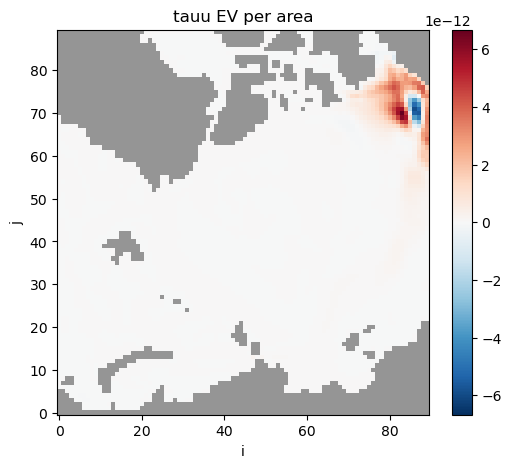

In [15]:
fig, ax = plt.subplots(1,1,figsize=[6,5])
tauu_expvar_vs_space_da.isel(tile=6).plot(ax=ax);
land.isel(tile=6).plot(ax=ax,cmap='Grays',add_colorbar=False);
ax.set_title('tauu EV per area');

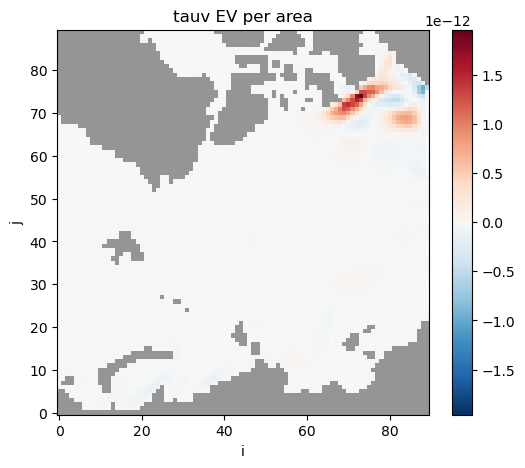

In [16]:
fig, ax = plt.subplots(1,1,figsize=[6,5])
tauv_expvar_vs_space_da.isel(tile=6).plot(ax=ax);
land.isel(tile=6).plot(ax=ax,cmap='Grays',add_colorbar=False);
ax.set_title('tauv EV per area');

Combine tauu and taux

In [9]:
nlag, nweeks = recon1d_sum_all_ctrl_vs_lag_time.shape

In [10]:
def open_binary_file_to_xda(dir_str, fname_str, nweeks):

    tiles = ecco.read_llc_to_tiles(dir_str, fname_str, llc=90,nk=1,nl=nweeks) # 1357 is number of weeks
    # compact = ecco.llc_compact_to_faces(compact_data)
    # tiles = ecco.llc_faces_to_tiles(compact)
    da = ecco.llc_tiles_to_xda(tiles, var_type='c', dim4='depth', dim5='time')

    return da

In [11]:
# open wind recon2d files
tauu_dir = '/efs_ecco/mzahn/emu_conv_v2/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_50/output/'
tauu_fname = 'recon2d_tauu.data'
tauv_dir = '/efs_ecco/mzahn/emu_conv_v2/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_50/output/'
tauv_fname = 'recon2d_tauv.data'

In [12]:
tauu_da = open_binary_file_to_xda(tauu_dir, tauu_fname, nweeks)
tauv_da = open_binary_file_to_xda(tauv_dir, tauv_fname, nweeks)

load_binary_array: loading file /efs_ecco/mzahn/emu_conv_v2/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_50/output/recon2d_tauu.data
load_binary_array: data array shape  (1357, 1, 1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1357, 1, 1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (1357, 1, 13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4
load_binary_array: loading file /efs_ecco/mzahn/emu_conv_v2/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_50/output/recon2d_tauv.data
load_binary_array: data array shape  (1357, 1, 1170, 90)
load_binary_array: data array type  >f4
llc_compact_to_faces: dims, llc  (1357, 1, 1170, 90) 90
llc_compact_to_faces: data_compact array type  >f4
llc_faces_to_tiles: data_tiles shape  (1357, 1, 13, 90, 90)
llc_faces_to_tiles: data_tiles dtype  >f4


In [13]:
def explained_variance(y_true, y_pred):
    """
    Explained variance = 1 - Var(y_true - y_pred) / Var(y_true)
    """
    numerator = np.var(y_true - y_pred)
    denominator = np.var(y_true)
    return 1 - numerator / denominator if denominator != 0 else 0.0

In [14]:
tau_da = tauv_da.isel(k=0) + tauu_da.isel(k=0)

In [15]:
recon_all = recon1d_sum_all_ctrl_vs_lag_time[nlag - 1, :]

In [16]:
# Create an empty array to store R² scores
r2_scores = np.full((13, 90, 90), np.nan)

# Loop through all spatial points
for tile in range(13):
    for j in range(90):
        for i in range(90):
            y_pred = tau_da[:, tile, j, i].values
            y_true = recon_all

            # Check for NaNs or constant values
            if np.any(np.isnan(y_pred)) or np.std(y_pred) == 0:
                continue

            r2 = explained_variance(y_true, y_pred)
            r2_scores[tile, j, i] = r2

# Convert results into a DataArray matching spatial dims
tau_ev = xr.DataArray(
    r2_scores,
    dims=("tile", "j", "i"),
    coords={"tile": tau_da.tile, "j": tau_da.j, "i": tau_da.i},
    name="explained_variance"
)

In [31]:
# scale by area
grid_area = ecco_grid.rA.where(ecco_grid.rA != 0)

tau_ev_scale = tau_ev / grid_area

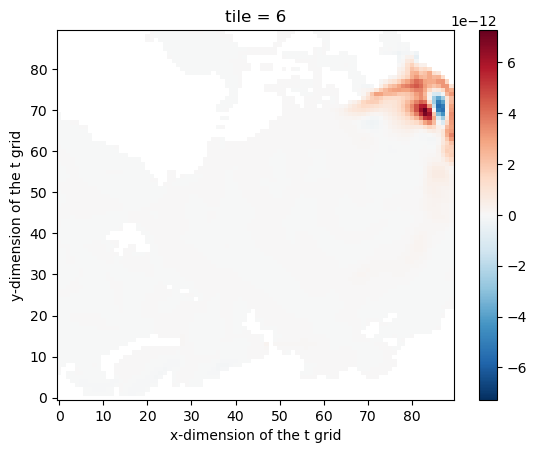

In [33]:
tau_ev_scale.isel(tile=6).plot();

In [45]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

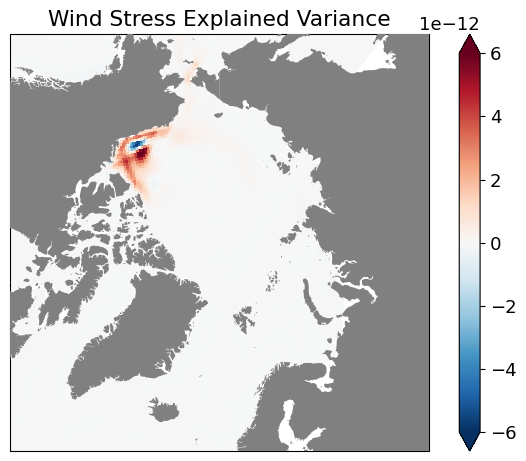

In [47]:
plt.rcParams['font.size'] = 13

fig = plt.figure()
ax = plt.axes(projection = ccrs.NorthPolarStereo())
xg = tau_ev_scale.XC
yg = tau_ev_scale.YC

cmap='RdBu_r'
vmax=6e-12

pcm2 = plt.pcolormesh(xg[2], yg[2],tau_ev_scale[2],transform = ccrs.PlateCarree(),vmax = vmax,vmin = -vmax,cmap = cmap)
pcm6 = plt.pcolormesh(xg[6], yg[6],tau_ev_scale[6],transform = ccrs.PlateCarree(),vmax = vmax,vmin = -vmax,cmap = cmap)
pcm7 = plt.pcolormesh(xg[7], yg[7],tau_ev_scale[7],transform = ccrs.PlateCarree(),vmax = vmax,vmin = -vmax,cmap = cmap)
pcmx = plt.pcolormesh(xg[10],yg[10],tau_ev_scale[10],transform = ccrs.PlateCarree(),vmax = vmax,vmin = -vmax,cmap = cmap)
plt.title('Wind Stress Explained Variance')
# ax.tricontourf(xx,yy,varexp[2].ravel(),levels = 50,transform = ccrs.PlateCarree())
plt.colorbar(extend = 'both')
ax.set_extent((-180,180,60,90),crs = ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,facecolor = 'grey',zorder = 10)
plt.tight_layout()

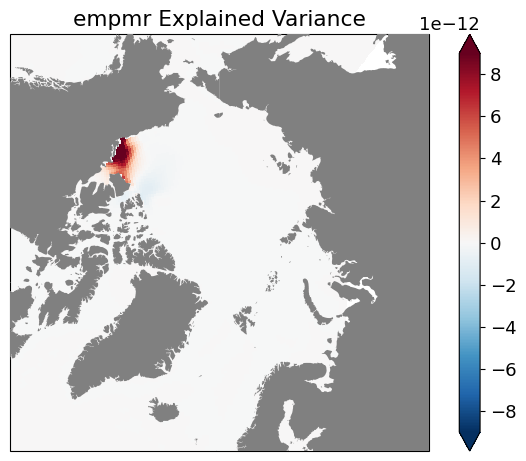

In [57]:
plt.rcParams['font.size'] = 13

fig = plt.figure()
ax = plt.axes(projection = ccrs.NorthPolarStereo())
xg = tau_ev_scale.XC
yg = tau_ev_scale.YC

cmap='RdBu_r'
vmax=9e-12

pcm2 = plt.pcolormesh(xg[2], yg[2],empmr_expvar_vs_space_da[2],transform = ccrs.PlateCarree(),vmax = vmax,vmin = -vmax,cmap = cmap)
pcm6 = plt.pcolormesh(xg[6], yg[6],empmr_expvar_vs_space_da[6],transform = ccrs.PlateCarree(),vmax = vmax,vmin = -vmax,cmap = cmap)
pcm7 = plt.pcolormesh(xg[7], yg[7],empmr_expvar_vs_space_da[7],transform = ccrs.PlateCarree(),vmax = vmax,vmin = -vmax,cmap = cmap)
pcmx = plt.pcolormesh(xg[10],yg[10],empmr_expvar_vs_space_da[10],transform = ccrs.PlateCarree(),vmax = vmax,vmin = -vmax,cmap = cmap)
plt.title('empmr Explained Variance')
# ax.tricontourf(xx,yy,varexp[2].ravel(),levels = 50,transform = ccrs.PlateCarree())
plt.colorbar(extend = 'both')
ax.set_extent((-180,180,60,90),crs = ccrs.PlateCarree())
ax.add_feature(cfeature.LAND,facecolor = 'grey',zorder = 10)
plt.tight_layout()

## Andrew's utilities

In [35]:
user_home_dir = expanduser('~')
sys.path.insert(0, join(user_home_dir,'emu-utilities'))
from emu_utilities.adjoint_gradient import load_adjoint_gradient

In [36]:
# not pip installable yet 
user_home_dir = expanduser('~')
sys.path.insert(0, join(user_home_dir, "emu-utilities"))

from emu_utilities import convolution, resample

# loads 2d convolution data
ds = convolution.load_2d_conv_gradient("/efs_ecco/mzahn/emu_conv_v2/emu_conv_275_275_4_mask3d.-143.0_-130.0_69.0_72.0_20.0_0.0_1_50")
# ds["taumag"] = (ds["tauu"]**2 + ds["tauv"]**2)**0.5
ds["taumag"] = (ds["tauu"] + ds["tauv"])

# computes variance scaled by grid area
sp_var = convolution.spatial_variance(ds, variable="taumag")

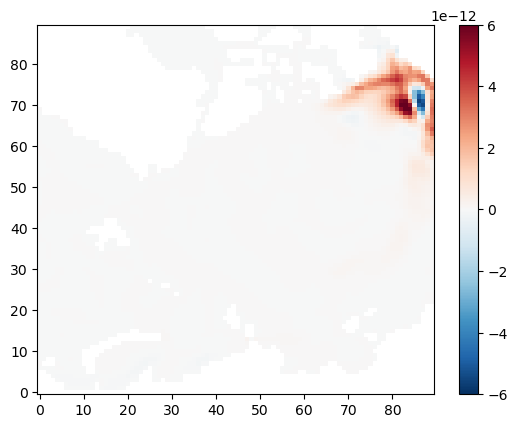

In [37]:
sp_var_select = sp_var.isel(tile=6)

plt.pcolormesh(
    sp_var_select["i"],
    sp_var_select["j"],
    sp_var_select, cmap='RdBu_r', vmin=-6e-12, vmax=6e-12
)
plt.colorbar();

## Explained variance vs lag

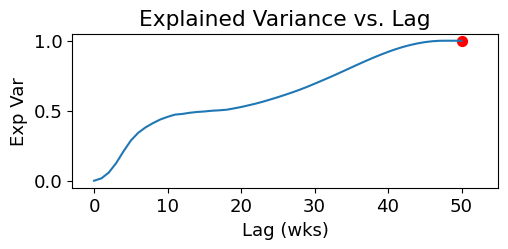

In [134]:
fig,ax = plt.subplots(1,1,figsize=[5.5,2])
ax.plot(lag_in_weeks, expvar_vs_lag);
ax.scatter(50,1,color='r',s=50)
ax.set_xlim(-3,55)
ax.set_title('Explained Variance vs. Lag')
ax.set_ylabel('Exp Var')
ax.set_xlabel('Lag (wks)');

## Explained variance vs lag

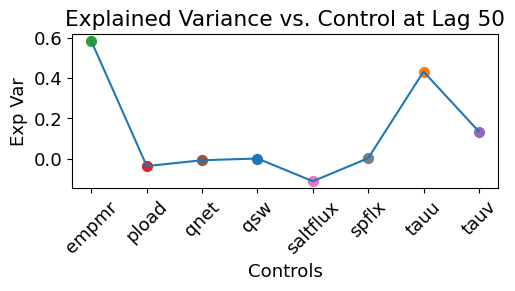

In [135]:
fig,ax = plt.subplots(1,1,figsize=[5.5,2])
ax.plot(ctrl_name, expvar_vs_ctrl);

# add dots
ax.scatter(ctrl_name[0],expvar_vs_ctrl[0],color='tab:green',s=50)
ax.scatter(ctrl_name[1],expvar_vs_ctrl[1],color='tab:red',s=50)
ax.scatter(ctrl_name[2],expvar_vs_ctrl[2],color='tab:brown',s=50)
ax.scatter(ctrl_name[3],expvar_vs_ctrl[3],color='tab:blue',s=50)
ax.scatter(ctrl_name[4],expvar_vs_ctrl[4],color='tab:pink',s=50)
ax.scatter(ctrl_name[5],expvar_vs_ctrl[5],color='tab:gray',s=50)
ax.scatter(ctrl_name[6],expvar_vs_ctrl[6],color='tab:orange',s=50)
ax.scatter(ctrl_name[7],expvar_vs_ctrl[7],color='tab:purple',s=50)

# rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45)

ax.set_title('Explained Variance vs. Control at Lag 50')
ax.set_ylabel('Exp Var')
ax.set_xlabel('Controls');

## Convolution reconstruction at lag 50

In [84]:
print(globals_dict_conv['return_vars']['ctrl_name'])

['empmr', 'pload', 'qnet', 'qsw', 'saltflux', 'spflx', 'tauu', 'tauv']


In [85]:
recon1d_vs_lag_time.shape

(8, 51, 1357)

In [86]:
# pull out wind stress components
tauu = recon1d_vs_lag_time[-2,:,:][-1] # -1 is pulling out last lag
tauv = recon1d_vs_lag_time[-1,:,:][-1]

recon_wind = tauu + tauv

# pull out empmr
empmr = recon1d_vs_lag_time[0,:,:][-1]

Create plot that shows $\Delta$ SSS from the ECCOv4r4 output (from sampling tool), the convolution of all the control variables, and the convolution of wind stress, and convolution of empmr

<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_53/536397781.py:16: SyntaxWarning: invalid escape sequence '\D'
  ax.set_ylabel("$\Delta$ SSS")


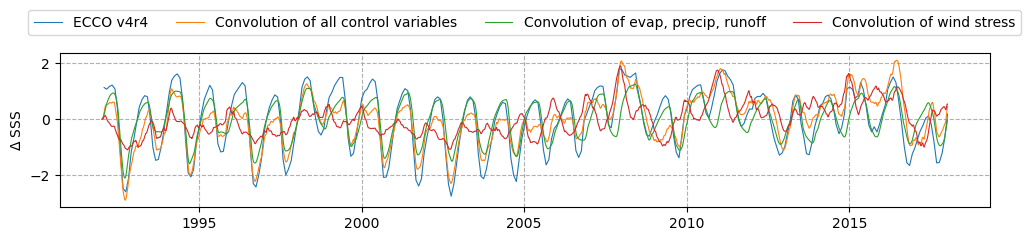

In [48]:
fig, ax = plt.subplots(1,1,figsize=[12,2])
lw = 0.8

ax.plot(samp_time_box,\
         delta_sss_box,label='ECCO v4r4',linewidth=lw);

plt.plot(time_values,\
         recon1d_sum_all_ctrl_vs_lag_time[-1],label='Convolution of all control variables',linewidth=lw);

ax.plot(time_values,\
         empmr,label='Convolution of evap, precip, runoff',linewidth=lw);

ax.plot(time_values,\
         recon_wind,label='Convolution of wind stress',linewidth=lw);

ax.set_ylabel("$\Delta$ SSS")
# plt.ylim(-0.15,0.15)
ax.set_xlabel("")
ax.grid(linewidth=lw,linestyle='dashed')
ax.legend(ncol=4,bbox_to_anchor=[0.5,1.2],loc='center');

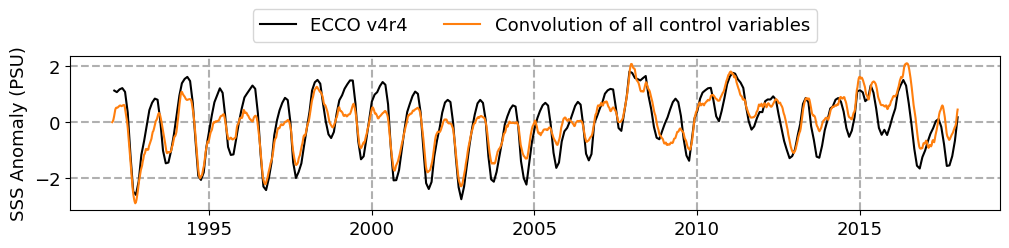

In [124]:
plt.rcParams['font.size'] = 13
fig, ax = plt.subplots(1,1,figsize=[12,2])
lw = 1.5

ax.plot(samp_time_box,\
         delta_sss_box,label='ECCO v4r4',linewidth=lw,color='k');

plt.plot(time_values,\
         recon1d_sum_all_ctrl_vs_lag_time[-1],label='Convolution of all control variables',linewidth=lw,color='tab:orange');

# ax.plot(time_values,\
#          empmr,label='Convolution of evap, precip, runoff',linewidth=lw);

# ax.plot(time_values,\
#          recon_wind,label='Convolution of wind stress',linewidth=lw);

ax.set_ylabel("SSS Anomaly (PSU)")
# plt.ylim(-0.15,0.15)
ax.set_xlabel("")
ax.grid(linewidth=lw,linestyle='dashed')
ax.legend(ncol=3,bbox_to_anchor=[0.5,1.2],loc='center');

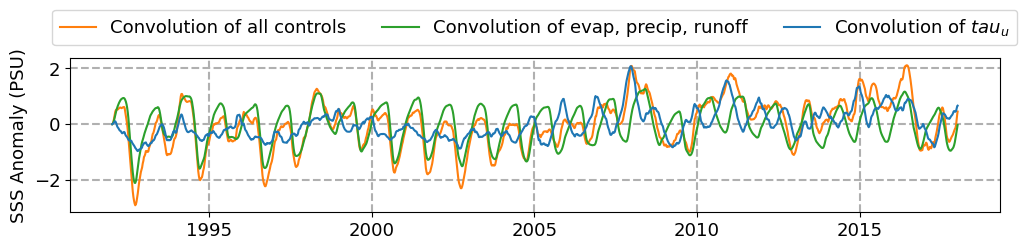

In [55]:
fig, ax = plt.subplots(1,1,figsize=[12,2])
lw = 1.5

# ax.plot(samp_time_box,\
#          delta_sss_box,label='ECCO v4r4',linewidth=lw);

plt.plot(time_values,recon1d_sum_all_ctrl_vs_lag_time[-1],label='Convolution of all controls',linewidth=lw,color='tab:orange');

ax.plot(time_values,empmr,label='Convolution of evap, precip, runoff',linewidth=lw,color='tab:green');

ax.plot(time_values,tauu,label='Convolution of $tau_u$',linewidth=lw,color='tab:blue');

ax.set_ylabel("SSS Anomaly (PSU)")
# plt.ylim(-0.15,0.15)
ax.set_xlabel("")
ax.grid(linewidth=lw,linestyle='dashed')
ax.legend(ncol=3,bbox_to_anchor=[0.5,1.2],loc='center');

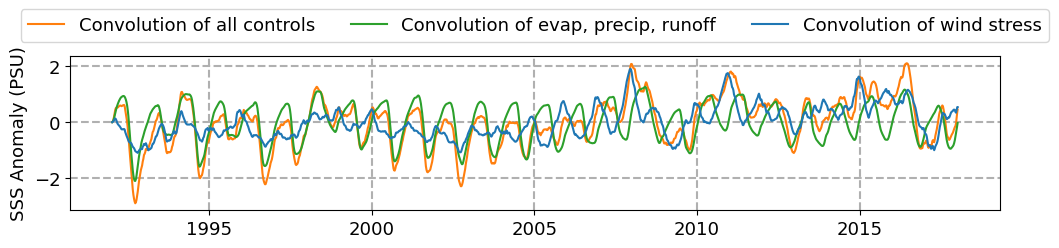

In [99]:
fig, ax = plt.subplots(1,1,figsize=[12,2])
lw = 1.5

# ax.plot(samp_time_box,\
#          delta_sss_box,label='ECCO v4r4',linewidth=lw);

plt.plot(time_values,recon1d_sum_all_ctrl_vs_lag_time[-1],label='Convolution of all controls',linewidth=lw,color='tab:orange');

ax.plot(time_values,empmr,label='Convolution of evap, precip, runoff',linewidth=lw,color='tab:green');

ax.plot(time_values,recon_wind,label='Convolution of wind stress',linewidth=lw,color='tab:blue');

ax.set_ylabel("SSS Anomaly (PSU)")
# plt.ylim(-0.15,0.15)
ax.set_xlabel("")
ax.grid(linewidth=lw,linestyle='dashed')
ax.legend(ncol=3,bbox_to_anchor=[0.5,1.2],loc='center');

### Remove seasonal cycle

In [43]:
import pandas as pd

In [45]:
# function to convert decimal years to datetime
def decimal_year_to_datetime(dyears):
    years = np.floor(dyears).astype(int)
    base_dates = pd.to_datetime([f"{y}-01-01" for y in years])
    next_year_dates = pd.to_datetime([f"{y+1}-01-01" for y in years])
    year_lengths = (next_year_dates - base_dates).days
    fractional = dyears - years
    return base_dates + pd.to_timedelta(fractional * year_lengths, unit='D')

In [47]:
# apply the function
samp_time_box_dt = decimal_year_to_datetime(samp_time_box)
time_values_dt = decimal_year_to_datetime(time_values)

In [88]:
# make datasets
delta_sss_box_da = xr.DataArray(delta_sss_box, coords={"time": samp_time_box_dt})
recon1d_sum_all = xr.DataArray(recon1d_sum_all_ctrl_vs_lag_time[-1], coords={"time": time_values_dt})
empmr_da = xr.DataArray(empmr, coords={"time": time_values_dt})
recon_wind_da = xr.DataArray(recon_wind, coords={"time": time_values_dt})

In [89]:
# group by month and compute average for each month
monthly_means_sss_box = delta_sss_box_da.groupby("time.month").mean()
monthly_means_recon1d = recon1d_sum_all.groupby("time.month").mean()
monthly_means_empmr = empmr_da.groupby("time.month").mean()
monthly_means_wind = recon_wind_da.groupby("time.month").mean()

# remove seasonal signal
sss_box_corrected = delta_sss_box_da.groupby("time.month") - monthly_means_sss_box
recon1d_corrected = recon1d_sum_all.groupby("time.month") - monthly_means_recon1d
empmr_corrected = empmr_da.groupby("time.month") - monthly_means_empmr
wind_corrected = recon_wind_da.groupby("time.month") - monthly_means_wind

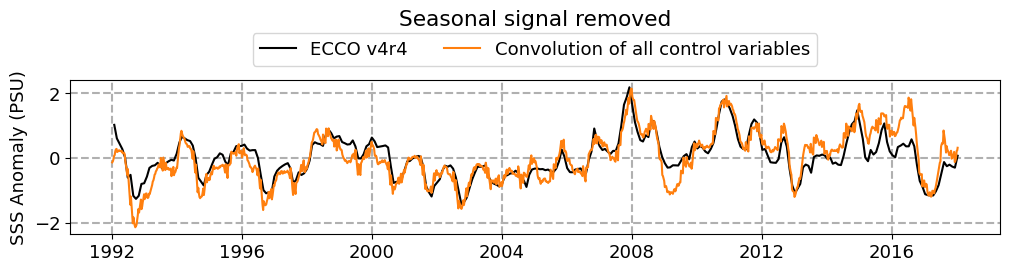

In [68]:
plt.rcParams['font.size'] = 13
fig, ax = plt.subplots(1,1,figsize=[12,2])
lw = 1.5

sss_box_corrected.plot(ax=ax,label='ECCO v4r4',linewidth=lw,color='k');
recon1d_corrected.plot(ax=ax,label='Convolution of all control variables',linewidth=lw,color='tab:orange');

ax.set_title("Seasonal signal removed\n\n")
ax.set_ylabel("SSS Anomaly (PSU)")
# plt.ylim(-0.15,0.15)
ax.set_xlabel("")
ax.grid(linewidth=lw,linestyle='dashed')
ax.legend(ncol=3,bbox_to_anchor=[0.5,1.2],loc='center');

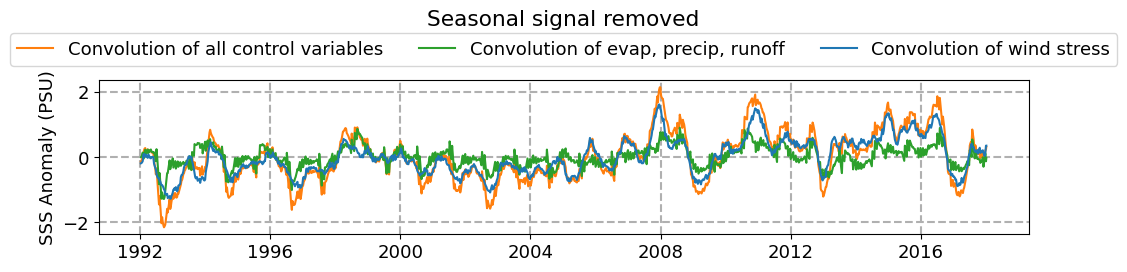

In [100]:
fig, ax = plt.subplots(1,1,figsize=[12,2])
lw = 1.5

recon1d_corrected.plot(ax=ax,label='Convolution of all control variables',linewidth=lw,color='tab:orange');
empmr_corrected.plot(ax=ax,label='Convolution of evap, precip, runoff',linewidth=lw,color='tab:green');
wind_corrected.plot(ax=ax,label='Convolution of wind stress',linewidth=lw,color='tab:blue');

ax.set_title("Seasonal signal removed\n\n")
ax.set_ylabel("SSS Anomaly (PSU)")
# plt.ylim(-0.15,0.15)
ax.set_xlabel("")
ax.grid(linewidth=lw,linestyle='dashed')
ax.legend(ncol=3,bbox_to_anchor=[0.5,1.2],loc='center');

### Just plot November

In [75]:
# select only November data - for SSS anomalies in box
november_data = sss_box_corrected.where(sss_box_corrected['time'].dt.month == 11, drop=True)

# resample by year and take the mean over November days in each year
november_mean_by_year = november_data.resample(time='YE').mean('time')

# replace time coordinate with November 15 of each corresponding year
years = november_mean_by_year['time'].dt.year.values
november_15_dates = pd.to_datetime([f"{year}-11-15" for year in years])

sss_box_corrected_nov = november_mean_by_year.assign_coords(time=november_15_dates)

In [79]:
# select only November data - for convolution reconstruction
november_data = recon1d_corrected.where(recon1d_corrected['time'].dt.month == 11, drop=True)

# resample by year and take the mean over November days in each year
november_mean_by_year = november_data.resample(time='YE').mean('time')

# replace time coordinate with November 15 of each corresponding year
years = november_mean_by_year['time'].dt.year.values
november_15_dates = pd.to_datetime([f"{year}-11-15" for year in years])

recon1d_corrected_nov = november_mean_by_year.assign_coords(time=november_15_dates)

In [92]:
# select only November data - for convolution of empmr
november_data = empmr_corrected.where(empmr_corrected['time'].dt.month == 11, drop=True)

# resample by year and take the mean over November days in each year
november_mean_by_year = november_data.resample(time='YE').mean('time')

# replace time coordinate with November 15 of each corresponding year
years = november_mean_by_year['time'].dt.year.values
november_15_dates = pd.to_datetime([f"{year}-11-15" for year in years])

empmr_corrected_nov = november_mean_by_year.assign_coords(time=november_15_dates)

In [93]:
# select only November data - for convolution of wind stress
november_data = wind_corrected.where(wind_corrected['time'].dt.month == 11, drop=True)

# resample by year and take the mean over November days in each year
november_mean_by_year = november_data.resample(time='YE').mean('time')

# replace time coordinate with November 15 of each corresponding year
years = november_mean_by_year['time'].dt.year.values
november_15_dates = pd.to_datetime([f"{year}-11-15" for year in years])

wind_corrected_nov = november_mean_by_year.assign_coords(time=november_15_dates)

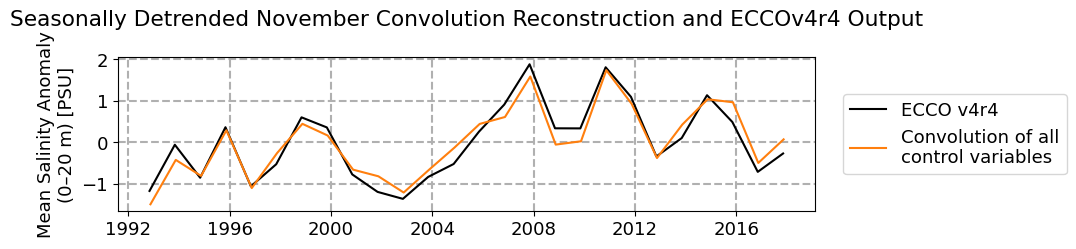

In [132]:
plt.rcParams['font.size'] = 13
fig, ax = plt.subplots(1,1,figsize=[9,2])
lw = 1.5

sss_box_corrected_nov.plot(ax=ax,label='ECCO v4r4',linewidth=lw,color='k');
recon1d_corrected_nov.plot(ax=ax,label='Convolution of all\ncontrol variables',linewidth=lw,color='tab:orange');

ax.set_title("Seasonally Detrended November Convolution Reconstruction and ECCOv4r4 Output\n")
ax.set_ylabel("Mean Salinity Anomaly\n(0–20 m) [PSU]")
# plt.ylim(-0.15,0.15)
ax.set_xlabel("")
ax.grid(linewidth=lw,linestyle='dashed')
ax.legend(ncol=1,bbox_to_anchor=[1.2,0.5],loc='center');

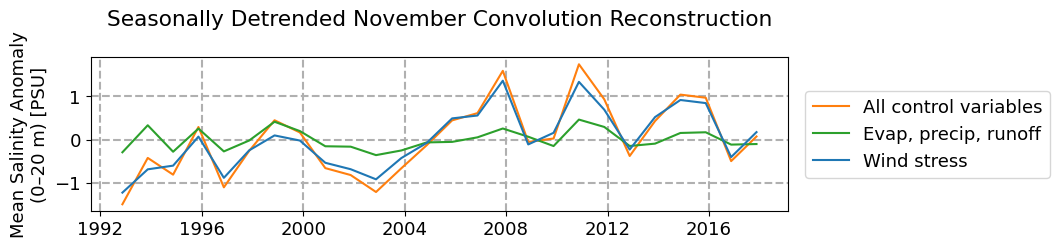

In [128]:
fig, ax = plt.subplots(1,1,figsize=[9,2])
lw = 1.5

recon1d_corrected_nov.plot(ax=ax,label='All control variables',linewidth=lw,color='tab:orange');
empmr_corrected_nov.plot(ax=ax,label='Evap, precip, runoff',linewidth=lw,color='tab:green');
wind_corrected_nov.plot(ax=ax,label='Wind stress',linewidth=lw,color='tab:blue');

ax.set_title("Seasonally Detrended November Convolution Reconstruction\n")
ax.set_ylabel("Mean Salinity Anomaly\n(0–20 m) [PSU]")
# plt.ylim(-0.15,0.15)
ax.set_xlabel("")
ax.grid(linewidth=lw,linestyle='dashed')
ax.legend(ncol=1,bbox_to_anchor=[1.2,0.5],loc='center');